# Portfolio Complex Systems Module 6 Recurrence Quantification Analysis

Name: Femian Dooms

Student number: 2086229

Data: Timeseries data featuring power imbalance prices in the Netherlands. Obtained from Tennet transparency (publicaly available).
91 data points measured from 01-01-2024 up untill 01-04-2024. Every datapoint is the mean price at time i where i is measured in days.

Sources:(https://www.geeksforgeeks.org/recurrence-relations-a-complete-guide/) code used from https://pypi.org/project/PyRQA/#usage

Contents:

Recurrence plot

Cross-Recurrence Quantification Analysis (CRQA)



In [1]:
import csv
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

# Create df 
df = pd.read_csv('final_dataset.csv', delimiter=',')
df = df.groupby('Date')[['imbalance_price', 'wind_production', 'solar_production', 'gas_production']].mean().reset_index()


## Recurrence
Recurrence is the degree to which a system comes to inhabit the same or a very similar state. We can use a recurrence time series plot, this is a time series plotted against itself (auto-recurrence), with a point being placed on the plot each time a prior state is exhibited by the system. 

We can code this by using pyts package (see code below). When we analyse the recurrence plot we see Short Vertical/Horizontal Lines. These can indicate that the system repeatedly visits a particular state but only for short periods. In addition we see quite some Single Points. These indicate rare states or noise. The system visits these states sporadically, suggesting non-recurrent or random behavior. And at last we notice that there are some white areas. These suggest that the states in these regions are not visited, indicating a lack of recurrence. This can be due to transitions between different regimes or states that are rarely revisited. 
We have seen these different characteristics in the plots of previous modules. As time progresses the datapoints become more chaotic, some very high/low prices rarely reoccur (single points). In addition the price moves up and down from point to point with we see here due to the short lines in the recurrence plot.

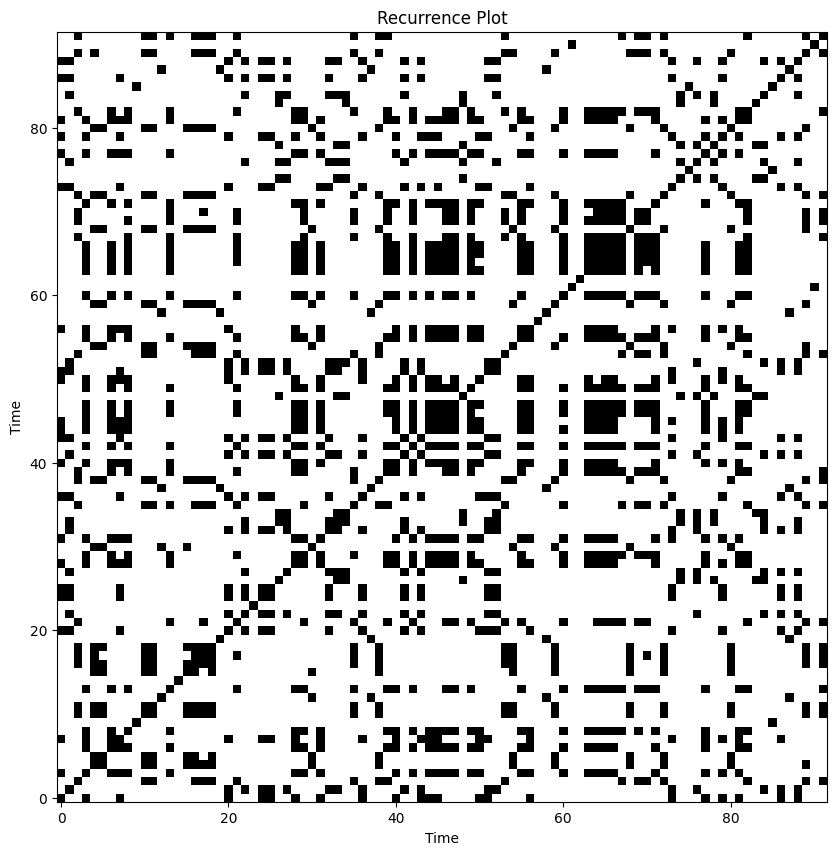

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pyts.image import RecurrencePlot


# Extract the time series data
time_series = df['imbalance_price'].values

# Compute the recurrence plot
rp = RecurrencePlot(threshold='point', percentage=20)
recurrence_matrix = rp.fit_transform(time_series.reshape(1, -1))[0]

# Plot the recurrence plot
plt.figure(figsize=(10, 10))
plt.imshow(recurrence_matrix, cmap='binary', origin='lower')
plt.xlabel('Time')
plt.ylabel('Time')
plt.title('Recurrence Plot')
plt.show()



## Cross-Recurrence Quantification Analysis (CRQA)
Cross-Recurrence Quantification Analysis (CRQA) is a method used to analyze the dynamics between two time series datasets. It extends Recurrence Quantification Analysis (RQA) by being able to compare two different sets of variables. We will use CRQA on the timeseries data of the price and the solar production timeseries to gain insights in their interaction and dynamics. 

CRQA involves the following steps:

Embedding the Time Series: Both time series are embedded into a higher-dimensional space using techniques like delay embedding.

Quantifying the Dynamics: Various metrics (recurrence rate and determinism) are calculated to quantify the dynamics and interactions between the two time series.

DET/RR Ratio (Determinism/Recurrence Rate):
This ratio indicates the proportion of recurrent points forming diagonal lines (deterministic structure) compared to the overall recurrence rate.
A value close to 1 suggests that most recurrence points contribute to deterministic structure rather than random behavior.

LAM/DET Ratio (Laminarity/Determinism):
This ratio indicates the proportion of recurrent points forming vertical lines (laminar states) compared to the deterministic structure.
A value close to 1 suggests that most deterministic structure contributes to laminar states, indicating relatively stable and predictable behavior.

In [28]:
from pyrqa.analysis_type import Cross
from pyrqa.computation import FixedRadius
from pyrqa.settings import Settings
from pyrqa.neighbourhood import FixedRadius
from pyrqa.metric import EuclideanMetric
from pyrqa.computation import RQAComputation
from pyrqa.time_series import TimeSeries
from sklearn.preprocessing import MinMaxScaler

# Extract the time series data
data_points_x = df['imbalance_price'].values

data_points_y = df['solar_production'].values


# Normalize the data
scaler = MinMaxScaler()
data_points_x = scaler.fit_transform(np.array(data_points_x).reshape(-1, 1)).flatten()
data_points_y = scaler.transform(np.array(data_points_y).reshape(-1, 1)).flatten()


time_series_x = TimeSeries(data_points_x,
                           embedding_dimension=2,
                           time_delay=1)

time_series_y = TimeSeries(data_points_y,
                           embedding_dimension=2,
                           time_delay=2)
time_series = (time_series_x,
               time_series_y)

settings = Settings(time_series,
                    analysis_type=Cross,
                    neighbourhood=FixedRadius(0.73),
                    similarity_measure=EuclideanMetric,
                    theiler_corrector=0)
computation = RQAComputation.create(settings,
                                    verbose=True)
result = computation.run()
result.min_diagonal_line_length = 2
result.min_vertical_line_length = 2
result.min_white_vertical_line_length = 2
print(result)

[Platform 'NVIDIA CUDA']
Vendor: NVIDIA Corporation
Version: OpenCL 3.0 CUDA 11.7.101
Profile: FULL_PROFILE
Extensions: cl_khr_global_int32_base_atomics cl_khr_global_int32_extended_atomics cl_khr_local_int32_base_atomics cl_khr_local_int32_extended_atomics cl_khr_fp64 cl_khr_3d_image_writes cl_khr_byte_addressable_store cl_khr_icd cl_khr_gl_sharing cl_nv_compiler_options cl_nv_device_attribute_query cl_nv_pragma_unroll cl_nv_d3d10_sharing cl_khr_d3d10_sharing cl_nv_d3d11_sharing cl_nv_copy_opts cl_nv_create_buffer cl_khr_int64_base_atomics cl_khr_int64_extended_atomics cl_khr_device_uuid cl_khr_pci_bus_info cl_khr_external_semaphore cl_khr_external_memory cl_khr_external_semaphore_win32 cl_khr_external_memory_win32


[Device 'NVIDIA GeForce RTX 3080 Ti Laptop GPU']
Vendor: NVIDIA Corporation
Type: 4
Version: OpenCL 3.0 CUDA
Profile: FULL_PROFILE
Max Clock Frequency: 1125
Global Mem Size: 17179344896
Address Bits: 64
Max Compute Units: 58
Max Work Group Size: 1024
Max Work Item Dimensi

## Results CRQA
Ratio determinism / recurrence rate (DET/RR): 1.013614
Ratio laminarity / determinism (LAM/DET): 0.999876

DET/RR ratio is slightly above 1, indicating that there is a slightly higher proportion of recurrence points forming diagonal lines (deterministic structure) compared to the overall recurrence rate.
LAM/DET ratio is very close to 1, indicating that almost all deterministic structure contributes to laminar states, suggesting stable and predictable behavior.
These results suggest that there is deterministic structure present in the system, and most of it contributes to stable and predictable behavior, which is a common finding in many dynamical systems. The presence of deterministic structure in a system suggests that there are underlying mechanisms or dynamics driving the behavior of the system.
It implies that the system's evolution is not purely random but follows certain rules or patterns over time.

With this information we now know more about our time series data. Whereas we concluded in previous modules that the imbalance prices moves quite chaotic but that there seems to be characteristics of complexity, we can now conclude that there is indeed underlying structures driving the system.


## Multivariate RQA (MDRQA)
We have now gained a better understanding of the dynamic between imbalance price and solar production. However, in the dataset we also have two more features; Wind production and gas production. We can analyse the dynamics of all four features by using a MDRQA analysis. MDRQA allows for the analysis of complex dynamics that arise from interactions between multiple variables or dimensions. It can reveal patterns of recurrence in the timeseries. IT can also be used to compare multivariate time series to assess similarities or differences in their dynamics. In this case, we will analyse the dynamics of our four features.

In [33]:
from pyrqa.computation import RQAComputation

# Example data
data_points_x = df['imbalance_price'].values
data_points_y = df['solar_production'].values
data_points_z = df['wind_production'].values
data_points_q = df['gas_production'].values


# Normalize the data
scaler = MinMaxScaler()
data_points_x = scaler.fit_transform(np.array(data_points_x).reshape(-1, 1)).flatten()
data_points_y = scaler.transform(np.array(data_points_y).reshape(-1, 1)).flatten()
data_points_z = scaler.transform(np.array(data_points_z).reshape(-1, 1)).flatten()
data_points_q = scaler.transform(np.array(data_points_q).reshape(-1, 1)).flatten()

# Create TimeSeries objects for each dimension
time_series_x = TimeSeries(data_points_x, embedding_dimension=2, time_delay=1)
time_series_y = TimeSeries(data_points_y, embedding_dimension=2, time_delay=1)
time_series_z = TimeSeries(data_points_z, embedding_dimension=2, time_delay=1)
time_series_q = TimeSeries(data_points_q, embedding_dimension=2, time_delay=1)

# Combine multiple time series into one
multivariate_time_series = [[x1, x2, x3, x4] for x1, x2, x3, x4 in zip(data_points_x, data_points_y, data_points_z, data_points_q)]
time_series = TimeSeries(multivariate_time_series, embedding_dimension=2, time_delay=1)

# Define settings for mdRQA
settings = Settings(time_series,
                    analysis_type=Cross,
                    neighbourhood=FixedRadius(0.73),
                    similarity_measure=EuclideanMetric,
                    theiler_corrector=0)

# Create computation object
computation = RQAComputation.create(settings, verbose=True)

# Run mdRQA computation
result = computation.run()
result.min_diagonal_line_length = 2
result.min_vertical_line_length = 2
result.min_white_vertical_line_length = 2

# Print result
print(result)


[Platform 'NVIDIA CUDA']
Vendor: NVIDIA Corporation
Version: OpenCL 3.0 CUDA 11.7.101
Profile: FULL_PROFILE
Extensions: cl_khr_global_int32_base_atomics cl_khr_global_int32_extended_atomics cl_khr_local_int32_base_atomics cl_khr_local_int32_extended_atomics cl_khr_fp64 cl_khr_3d_image_writes cl_khr_byte_addressable_store cl_khr_icd cl_khr_gl_sharing cl_nv_compiler_options cl_nv_device_attribute_query cl_nv_pragma_unroll cl_nv_d3d10_sharing cl_khr_d3d10_sharing cl_nv_d3d11_sharing cl_nv_copy_opts cl_nv_create_buffer cl_khr_int64_base_atomics cl_khr_int64_extended_atomics cl_khr_device_uuid cl_khr_pci_bus_info cl_khr_external_semaphore cl_khr_external_memory cl_khr_external_semaphore_win32 cl_khr_external_memory_win32


[Device 'NVIDIA GeForce RTX 3080 Ti Laptop GPU']
Vendor: NVIDIA Corporation
Type: 4
Version: OpenCL 3.0 CUDA
Profile: FULL_PROFILE
Max Clock Frequency: 1125
Global Mem Size: 17179344896
Address Bits: 64
Max Compute Units: 58
Max Work Group Size: 1024
Max Work Item Dimensi

## Reuslts MRQA
DET/RR Ratio (Determinism/Recurrence Rate):

The value of 3.489796 suggests that there is a relatively high proportion of recurrent points forming diagonal lines (deterministic structure) compared to the overall recurrence rate. This could imply that there are strong deterministic patterns or structures present in your data, which occur repeatedly over time.

LAM/DET Ratio (Laminarity/Determinism):

The value of 0.00 indicates that there are no recurrent points forming vertical lines (laminar states) compared to the deterministic structure. This result suggests that while there are deterministic patterns present, they do not exhibit stable and predictable behavior over time.
The extremely low value of LAM/DET could imply that the deterministic patterns in your data are not forming stable, repeating sequences or patterns over time. This could be due to various reasons such as noise, chaos, or irregularities in the underlying dynamics.